In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt

df = pd.json_normalize(json.load(open("output/mugshots.json")))
df.head()


,ID,NAME,COUNTRY,ARRESTED,CONVICTED_OF,GANG_AFFILIATION,PICTURE,PICTURE_LOCAL,DEEPFACE.age,DEEPFACE.gender.dominant,DEEPFACE.gender.confidence,DEEPFACE.race.dominant,DEEPFACE.race.confidence,DEEPFACE.emotion.dominant,DEEPFACE.emotion.confidence,DEEPFACE.face_confidence
0,Sahal_20Osman_20Shidane,Sahal Osman Shidane,SOMALIA,"Minneapolis, Minnesota",[Criminal sexual conduct fourth degree of a vi...,,https://www.dhs.gov/sites/default/files/styles...,/home/richard/code/DHS_WOW_scraper/output/mugs...,31.0,Man,100.0,black,92.6,neutral,84.8,0.93
1,901b6d201b17887cb34819b3ce51ec81,MENG VANG,LAOS,"Saint Paul, Minnesota","[Assault, Aggravated Assault - Non-family-Weap...",,https://www.dhs.gov/sites/default/files/styles...,/home/richard/code/DHS_WOW_scraper/output/mugs...,39.0,Man,99.9,asian,100.0,angry,44.9,0.91
2,80c72b1d11c099baaa2e00c802aa8638,RENE HERNANDEZ,EL SALVADOR,"Moose Lake, Minnesota",[Sex Assault],,https://www.dhs.gov/sites/default/files/styles...,/home/richard/code/DHS_WOW_scraper/output/mugs...,41.0,Man,100.0,latino hispanic,33.5,sad,71.2,0.89
3,e683a76787d5a3f8ea1e20108417fbf3,JAIME TIRADO-HERNANDEZ,MEXICO,"Lino Lakes, Minnesota","[Assault, Homicide]",Surenos (sur-13),https://www.dhs.gov/sites/default/files/styles...,/home/richard/code/DHS_WOW_scraper/output/mugs...,26.0,Man,100.0,white,42.5,sad,79.9,0.90
4,e2cd4aefa25449763f110f61db4f1b1d,OUDONE LOTHIRATH,LAOS,"Minneapolis, Minnesota","[Assault, Aggravated Assault - Gun]",,https://www.dhs.gov/sites/default/files/styles...,/home/richard/code/DHS_WOW_scraper/output/mugs...,49.0,Man,100.0,asian,47.9,neutral,68.0,0.92


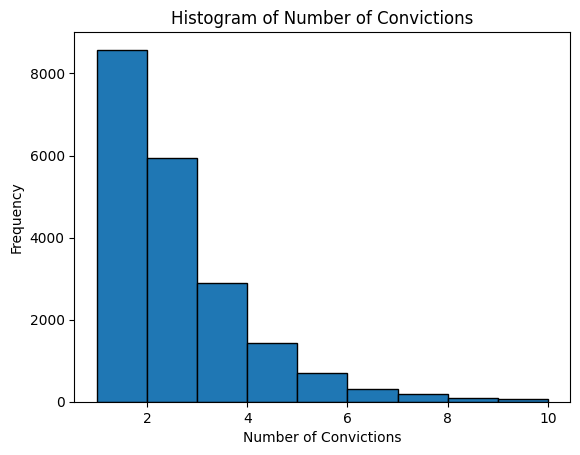

In [5]:
df["num_convictions"] = df["CONVICTED_OF"].apply(lambda x: len(x) if isinstance(x, list) else 1)
#histogram of the number of convictions
plt.hist(df["num_convictions"], bins=range(1, 11), edgecolor='black')
plt.xlabel('Number of Convictions')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Convictions')
plt.show()


In [6]:
# Explode CONVICTED_OF so each conviction is on its own row
df_exploded = df.explode('CONVICTED_OF')

# Show the exploded data
print(f"Original rows: {len(df)}")
print(f"After exploding: {len(df_exploded)}")
df_exploded[['NAME', 'CONVICTED_OF']].head(10)

Original rows: 20249
After exploding: 43369


,NAME,CONVICTED_OF
0,Sahal Osman Shidane,Criminal sexual conduct fourth degree of a vic...
1,MENG VANG,Assault
1,MENG VANG,Aggravated Assault - Non-family-Weapon
1,MENG VANG,Aggravated Assault - Weapon
1,MENG VANG,Threat Terroristic State Offenses
2,RENE HERNANDEZ,Sex Assault
3,JAIME TIRADO-HERNANDEZ,Assault
3,JAIME TIRADO-HERNANDEZ,Homicide
4,OUDONE LOTHIRATH,Assault
4,OUDONE LOTHIRATH,Aggravated Assault - Gun


In [7]:
#Illegal Re-Entry (INA SEC.101(a)(43)(O),8USC1326 only) is considered two different things becasue of the comma
df_exploded.head()
# Drop rows where CONVICTED_OF = '8USC1326 only)'
print(f"Before dropping: {len(df_exploded)} rows")
df_exploded = df_exploded[df_exploded['CONVICTED_OF'] != '8USC1326 only)']
print(f"After dropping: {len(df_exploded)} rows")

Before dropping: 43369 rows
After dropping: 39982 rows


In [8]:
#now change it to the proper name
df_exploded['CONVICTED_OF'] = df_exploded['CONVICTED_OF'].str.replace('Illegal Re-Entry (INA SEC.101(a)(43)(O)', 'Illegal Re-Entry (INA SEC.101(a)(43)(O), 8USC1326 only) ')
df_exploded.head()


,ID,NAME,COUNTRY,ARRESTED,CONVICTED_OF,GANG_AFFILIATION,PICTURE,PICTURE_LOCAL,DEEPFACE.age,DEEPFACE.gender.dominant,DEEPFACE.gender.confidence,DEEPFACE.race.dominant,DEEPFACE.race.confidence,DEEPFACE.emotion.dominant,DEEPFACE.emotion.confidence,DEEPFACE.face_confidence,num_convictions
0,Sahal_20Osman_20Shidane,Sahal Osman Shidane,SOMALIA,"Minneapolis, Minnesota",Criminal sexual conduct fourth degree of a vic...,,https://www.dhs.gov/sites/default/files/styles...,/home/richard/code/DHS_WOW_scraper/output/mugs...,31.0,Man,100.0,black,92.6,neutral,84.8,0.93,1
1,901b6d201b17887cb34819b3ce51ec81,MENG VANG,LAOS,"Saint Paul, Minnesota",Assault,,https://www.dhs.gov/sites/default/files/styles...,/home/richard/code/DHS_WOW_scraper/output/mugs...,39.0,Man,99.9,asian,100.0,angry,44.9,0.91,4
1,901b6d201b17887cb34819b3ce51ec81,MENG VANG,LAOS,"Saint Paul, Minnesota",Aggravated Assault - Non-family-Weapon,,https://www.dhs.gov/sites/default/files/styles...,/home/richard/code/DHS_WOW_scraper/output/mugs...,39.0,Man,99.9,asian,100.0,angry,44.9,0.91,4
1,901b6d201b17887cb34819b3ce51ec81,MENG VANG,LAOS,"Saint Paul, Minnesota",Aggravated Assault - Weapon,,https://www.dhs.gov/sites/default/files/styles...,/home/richard/code/DHS_WOW_scraper/output/mugs...,39.0,Man,99.9,asian,100.0,angry,44.9,0.91,4
1,901b6d201b17887cb34819b3ce51ec81,MENG VANG,LAOS,"Saint Paul, Minnesota",Threat Terroristic State Offenses,,https://www.dhs.gov/sites/default/files/styles...,/home/richard/code/DHS_WOW_scraper/output/mugs...,39.0,Man,99.9,asian,100.0,angry,44.9,0.91,4


In [9]:
# Count occurrences of each conviction type
conviction_counts = df_exploded['CONVICTED_OF'].value_counts()
unique_convictions = df_exploded['CONVICTED_OF'].unique()

# Show top 20 most common convictions
print("Top 20 Most Common Convictions:")
print(conviction_counts.head(20))

Top 20 Most Common Convictions:
CONVICTED_OF
Illegal Re-Entry (INA SEC.101(a)(43)(O), 8USC1326 only)     3387
Assault                                                     2426
Drug Trafficking                                            1665
Burglary                                                    1587
Driving Under Influence Liquor                              1394
Dangerous Drugs                                             1371
Larceny                                                      999
Sex Assault                                                  918
Aggravated Assault - Weapon                                  887
Robbery                                                      877
Drug Possession                                              796
Cocaine - Sell                                               761
Possession Of Weapon                                         695
Smuggling Aliens                                             657
Cocaine - Possession                         

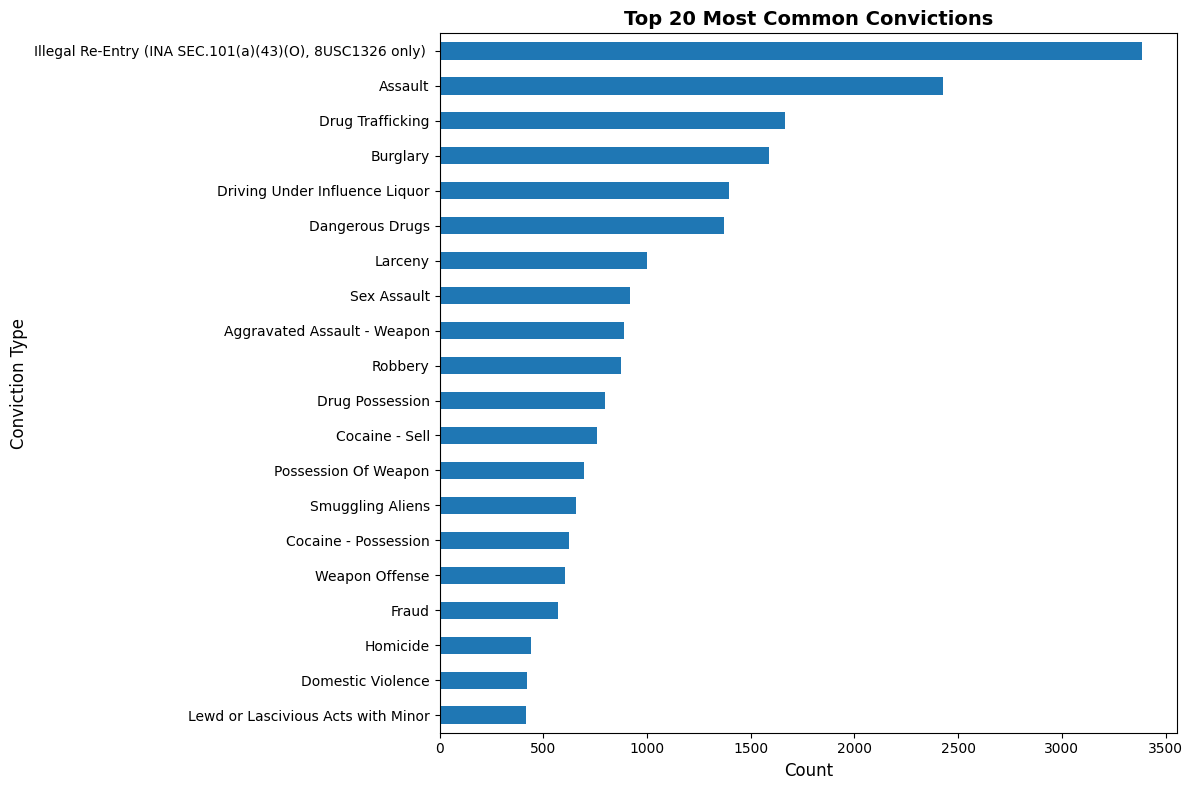

In [10]:
# Create histogram of top 20 convictions
top_convictions = conviction_counts.head(20)

plt.figure(figsize=(12, 8))
top_convictions.plot(kind='barh')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Conviction Type', fontsize=12)
plt.title('Top 20 Most Common Convictions', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Show highest at top
plt.tight_layout()
plt.show()

In [11]:
#try to merge conviction types that are similar
pd.set_option('display.max_rows', None)
pd.DataFrame(unique_convictions, columns=['CONVICTED_OF']).to_csv('unique_convictions.csv', index=False)
conviction_counts

CONVICTED_OF
Illegal Re-Entry (INA SEC.101(a)(43)(O), 8USC1326 only)                                                   3387
Assault                                                                                                   2426
Drug Trafficking                                                                                          1665
Burglary                                                                                                  1587
Driving Under Influence Liquor                                                                            1394
Dangerous Drugs                                                                                           1371
Larceny                                                                                                    999
Sex Assault                                                                                                918
Aggravated Assault - Weapon                                                                        

In [12]:
# Define crime categories with keywords (all keywords validated against unique_convictions / CONVICTED_OF)
# categorize_crime returns ALL matching categories so one conviction can fit multiple (e.g. "Sexual assault with a firearm")
def categorize_crime(crime):
    """Return a list of all matching categories for this crime (order = priority for 'primary')."""
    crime_lower = str(crime).lower()
    out = []
    
    # Drug-related crimes
    drug_keywords = ['drug', 'cocaine', 'marijuana', 'amphetamine', 'opium', 'hallucinogen',
                     'methamphetamine', 'controlled substance', 'narcotic', 'heroin']
    if any(keyword in crime_lower for keyword in drug_keywords):
        out.append('Drug-Related')
    
    # Sexual offenses
    sex_keywords = ['sex', 'rape', 'sodomy', 'lewd', 'lascivious', 'fondling', 'incest',
                    'bestiality', 'sexual', 'indecent exposure', 'peeping tom', 'molestation', 'voyeurism']
    if any(keyword in crime_lower for keyword in sex_keywords):
        out.append('Sexual Offenses')
    
    # Theft-related
    theft_keywords = ['theft', 'larceny', 'robbery', 'burglary', 'stolen', 'embezzle',
                     'vehicle theft', 'aircraft theft', 'receiving stolen', 'shoplifting', 'carjacking']
    if any(keyword in crime_lower for keyword in theft_keywords):
        out.append('Theft-Related')
    
    # Assault/Violence
    assault_keywords = ['assault', 'battery', 'homicide', 'murder', 'manslaughter',
                       'domestic violence', 'domestic assault', 'domestic battery']
    if any(keyword in crime_lower for keyword in assault_keywords):
        out.append('Assault/Violence')
    
    # Weapons
    weapon_keywords = ['weapon', 'gun', 'firearm', 'explosive', 'incendiary device',
                       'carrying concealed', 'carrying prohibited']
    if any(keyword in crime_lower for keyword in weapon_keywords):
        out.append('Weapons')
    
    # Kidnapping/False Imprisonment
    kidnap_keywords = ['kidnap', 'false imprisonment', 'hostage']
    if any(keyword in crime_lower for keyword in kidnap_keywords):
        out.append('Kidnapping/False Imprisonment')
    
    # Property damage
    property_keywords = ['damage property', 'damaging property', 'arson']
    if any(keyword in crime_lower for keyword in property_keywords):
        out.append('Property Damage')
    
    # Fraud
    fraud_keywords = ['fraud', 'forgery', 'impersonating', 'false statement', 'confidence game']
    if any(keyword in crime_lower for keyword in fraud_keywords):
        out.append('Fraud')
    
    # Traffic violations
    traffic_keywords = ['driving under influence', 'hit and run', 'traffic',
                        'driving', 'license', 'registration', 'intoxicated']
    if any(keyword in crime_lower for keyword in traffic_keywords):
        out.append('Traffic Violations')
    
    # Immigration
    immigration_keywords = ['illegal entry', 'illegal re-entry', 'illegal reentry', 'smuggling aliens',
                          'human smuggling', '8usc1326', '8usc1325', 'ina sec']
    if any(keyword in crime_lower for keyword in immigration_keywords):
        out.append('Immigration')
    
    # Obstruction/Resisting
    obstruction_keywords = ['obstruction', 'obstructing', 'resisting', 'refusing to aid officer',
                           'obstructing court order']
    if any(keyword in crime_lower for keyword in obstruction_keywords):
        out.append('Obstruction/Resisting')
    
    # Child abuse/neglect
    child_keywords = ['cruelty toward child', 'neglect', 'non-support']
    if any(keyword in crime_lower for keyword in child_keywords):
        out.append('Child Abuse/Neglect')
    
    # Gambling
    gambling_keywords = ['gambling', 'establish gambling']
    if any(keyword in crime_lower for keyword in gambling_keywords):
        out.append('Gambling')
    
    # Environmental/Conservation
    env_keywords = ['conservation', 'environment', 'health', 'safety']
    if any(keyword in crime_lower for keyword in env_keywords):
        out.append('Environmental/Conservation')
    
    # Bribery/Extortion
    bribe_keywords = ['bribe', 'extortion', 'racketeering']
    if any(keyword in crime_lower for keyword in bribe_keywords):
        out.append('Bribery/Extortion')
    
    # Flight/Escape
    flight_keywords = ['flight to avoid', 'escape', 'abscond', 'harboring escapee']
    if any(keyword in crime_lower for keyword in flight_keywords):
        out.append('Flight/Escape')
    
    # Probation/Parole violations
    probation_keywords = ['probation violation', 'parole violation', 'violating probation']
    if any(keyword in crime_lower for keyword in probation_keywords):
        out.append('Probation/Parole Violations')
    
    if not out:
        out.append('Other')
    return out

# Apply on original df (one row per person): get unique categories across all their convictions
def convictions_to_categorize(L):
    lst = L if isinstance(L, list) else [L]
    return [c for c in lst if c != '8USC1326 only)']

# For each person: get all categories from all their convictions, then dedupe
df['CRIME_CATEGORIES'] = df['CONVICTED_OF'].apply(
    lambda L: sorted(set(
        cat for c in convictions_to_categorize(L)
        for cat in categorize_crime(c)
    ))
)

# Counts: flatten all categories from all people
all_categories = [cat for row in df['CRIME_CATEGORIES'] for cat in row]
category_counts = pd.Series(all_categories).value_counts()
print("Count by category (each person counted once per unique category they have):")
print(category_counts)
print(f"\ntotal people: {len(df)}")
print(f"total category mentions: {sum(category_counts)}")

Count by category (each person counted once per unique category they have):
Assault/Violence                 6239
Drug-Related                     5980
Theft-Related                    4170
Immigration                      4040
Traffic Violations               3665
Weapons                          3307
Other                            2566
Sexual Offenses                  2482
Fraud                            1737
Flight/Escape                     448
Obstruction/Resisting             441
Kidnapping/False Imprisonment     365
Child Abuse/Neglect               357
Probation/Parole Violations       337
Property Damage                   296
Bribery/Extortion                  65
Environmental/Conservation         61
Gambling                            7
Name: count, dtype: int64

total people: 20249
total category mentions: 36563


In [16]:
df.head()
df.to_csv('transformed_df.csv', index=False)

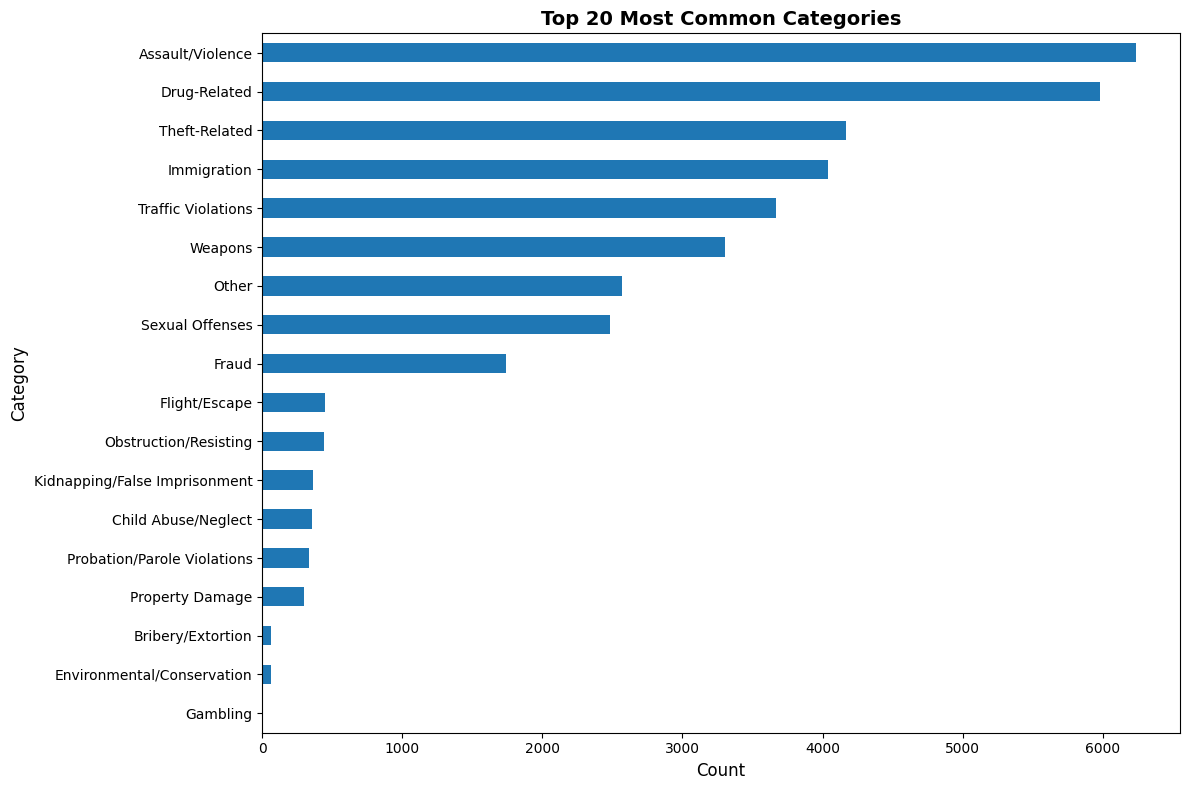

In [14]:
#HISTOGRAM OF CRIME CATEGORIES
categories_exploded = df.explode('CRIME_CATEGORIES')

plt.figure(figsize=(12, 8))
categories_counts = categories_exploded['CRIME_CATEGORIES'].value_counts()
categories_counts.plot(kind='barh')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Top 20 Most Common Categories', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Show highest at top
plt.tight_layout()
plt.show()

In [15]:
#geographical data - Map of arrests by city/state (uses df - one count per arrest)
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import json
import time
from pathlib import Path

GEOCODE_CACHE_PATH = Path("geocode_cache.json")

# Extract city and state from ARRESTED column; count each arrest once
arrest_locations = df['ARRESTED'].dropna().unique()
location_counts = df['ARRESTED'].value_counts().to_dict()

# Load existing cache
if GEOCODE_CACHE_PATH.exists():
    with open(GEOCODE_CACHE_PATH) as f:
        location_coords = {k: dict(v) for k, v in json.load(f).items()}
    print(f"Loaded {len(location_coords)} locations from {GEOCODE_CACHE_PATH}")
else:
    location_coords = {}

# Geocode only missing locations and save immediately
missing = [loc for loc in arrest_locations if pd.notna(loc) and loc not in location_coords]
if missing:
    geolocator = Nominatim(user_agent="arrest_map_app", timeout=10)
    print(f"Geocoding {len(missing)} new locations...")
    for location in missing:
        try:
            location_str = f"{location}, USA"
            location_obj = geolocator.geocode(location_str)
            if location_obj:
                location_coords[location] = {"lat": location_obj.latitude, "lon": location_obj.longitude}
                # Save immediately to cache
                with open(GEOCODE_CACHE_PATH, "w") as f:
                    json.dump(location_coords, f, indent=2)
                print(f"✓ {location}: ({location_obj.latitude}, {location_obj.longitude}) [saved]")
            else:
                print(f"✗ Could not geocode: {location}")
            #time.sleep(1)
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            print(f"✗ Error geocoding {location}: {e}")
    print(f"Cache updated: {len(location_coords)} total locations in {GEOCODE_CACHE_PATH}")
else:
    print("All locations already in cache.")

# Build plot data: only locations we have coords for; add count from dataset
plot_data = {}
for loc, latlon in location_coords.items():
    if loc in location_counts:
        plot_data[loc] = {**latlon, "count": location_counts[loc]}

# Prepare data for plotting
lats = [d['lat'] for d in plot_data.values()]
lons = [d['lon'] for d in plot_data.values()]
counts = [d['count'] for d in plot_data.values()]
locations = list(plot_data.keys())

if not plot_data:
    print("No locations to plot (cache has no matches for current dataset).")
else:
    fig = go.Figure()
    fig.add_trace(go.Scattergeo(
        lon=lons,
        lat=lats,
        text=[f"{loc}<br>Arrests: {count}" for loc, count in zip(locations, counts)],
        mode='markers',
        marker=dict(
            size=[max(5, count/2) for count in counts],
            sizemode='diameter',
            sizemin=5,
            sizeref=2*max(counts)/(50**2),
            color=counts,
            colorscale='Reds',
            showscale=True,
            colorbar=dict(title="Number of Arrests"),
            line=dict(width=1, color='black')
        ),
        name='Arrests'
    ))
    fig.update_layout(
        title=dict(text='Arrests by Location (US Map)', font=dict(size=20, family='Arial Black')),
        geo=dict(
            scope='usa',
            projection_type='albers usa',
            showland=True,
            landcolor='rgb(217, 217, 217)',
            subunitcolor='rgb(255, 255, 255)',
            countrycolor='rgb(255, 255, 255)',
            showlakes=True,
            lakecolor='rgb(255, 255, 255)',
            showsubunits=True,
            showcountries=True,
            resolution=50
        ),
        height=800,
        margin=dict(l=0, r=0, t=50, b=0)
    )
    fig.show()
    print(f"\nTotal locations on map: {len(plot_data)}")
    print(f"Total arrests mapped: {sum(counts)}")


Loaded 2507 locations from geocode_cache.json
Geocoding 35 new locations...
✗ Could not geocode: Moosel Lake, Minnesota
✗ Could not geocode: Winnfield, Arkansas
✗ Could not geocode: Tillary, North Carolina
✗ Could not geocode: Geeley, Colorado
✗ Could not geocode: Newtown Grove, North Carolina
✗ Could not geocode: Convington, Virginia
✗ Could not geocode: La Gragne, Kentucky
✗ Could not geocode: Hot Springs National Pa, Arkansas
✗ Could not geocode: IDIAN SPRINGS, Nevada
✗ Could not geocode: Kingisher, Oklahoma
✗ Could not geocode: Orelando, Florida
✗ Could not geocode: Bruceton Mills, Pennsylvania
✗ Could not geocode: Shellbyville, Tennessee
✗ Could not geocode: Millcreeks, Utah
✗ Could not geocode: Le Mars, Nebraska
✗ Could not geocode: Conroeus, Texas
✗ Could not geocode: Moorseville, North Carolina
✗ Could not geocode: Chesteron, Indiana
✗ Could not geocode: Plugerville, Texas
✗ Could not geocode: Buitner, North Carolina
✗ Could not geocode: Braithwaithe, Louisiana
✗ Could not geoc


Total locations on map: 2507
Total arrests mapped: 20205
